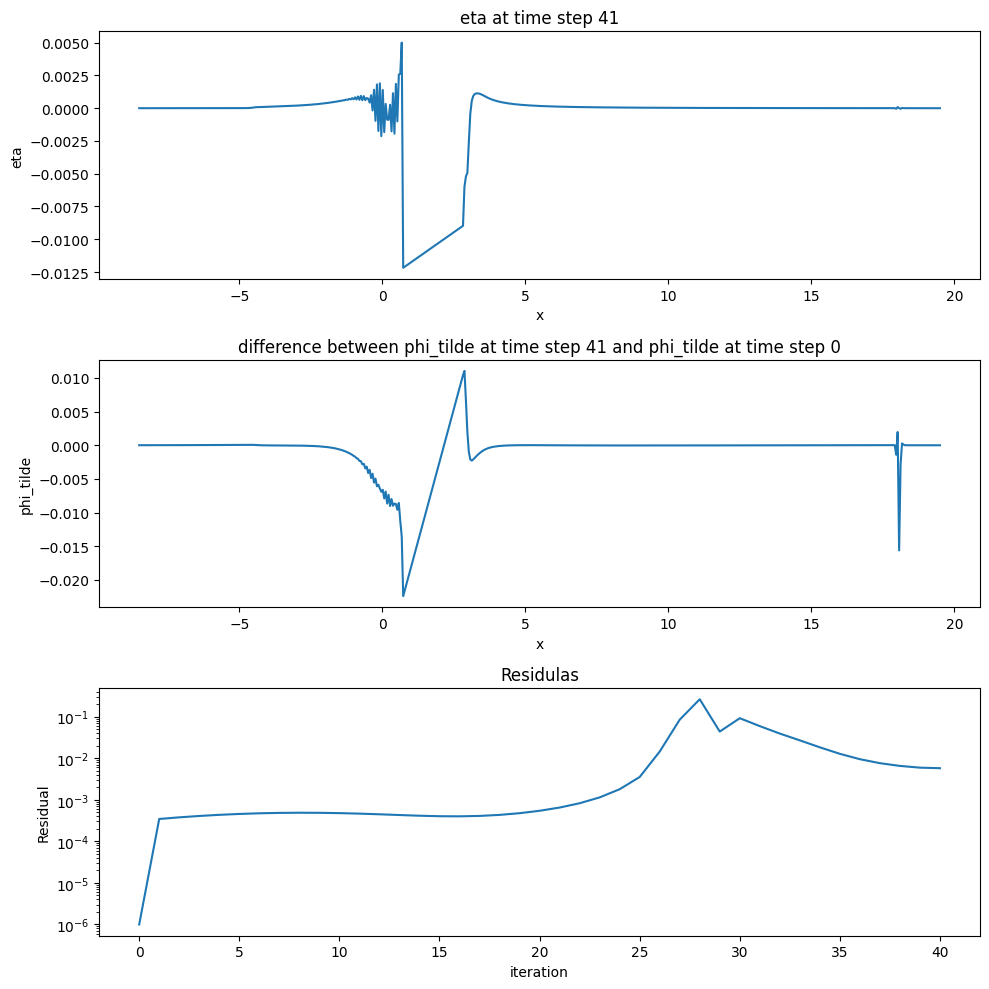

In [16]:
import matplotlib.pyplot as plt
import numpy as np

eta = np.load("./arrays/eta.npy")
phi = np.load("./arrays/phiTilde.npy")
fs_xs = np.load("./arrays/coordsFS.npy")

# sorter informationen i alle numpy arrays
idx = np.argsort(fs_xs, axis=1)
eta = np.take_along_axis(eta, idx, axis=1)
phi = np.take_along_axis(phi, idx, axis=1)
fs_xs = np.take_along_axis(fs_xs, idx, axis=1)

residuals = np.load("./arrays/residuals.npy")
residuals, time_step = residuals[:,0], residuals[:,1]

fig, ax = plt.subplots(3, 1, figsize = (10,10))
time = np.where(time_step == 0)[0][0] - 1
try:
    time = np.where(time_step == 0)[0][0] - 1
except:
    time = len(time_step) - 1

# time = 1

height_of_FS = eta[0][0]
ax[0].plot(fs_xs[time][:], eta[time][:]-height_of_FS)
if time - 50 > 0:
    ax[0].plot(fs_xs[time-10][:], eta[time-10][:] - 1, alpha = 0.7, linestyle = "--")
    ax[0].plot(fs_xs[time-50][:], eta[time-50][:] - 1, alpha = 0.5, linestyle = "--")

ax[0].set_title(f"eta at time step {time}" )
ax[0].set_xlabel("x")
ax[0].set_ylabel("eta")

init_phi = phi[0]
ax[1].plot(fs_xs[0], phi[time]-init_phi)
if time - 50 > 0:
    ax[1].plot(fs_xs[0], phi[time-10], alpha = 0.7, linestyle = "--")
    ax[1].plot(fs_xs[0], phi[time-50], alpha = 0.5, linestyle = "--")
ax[1].set_title(f"difference between phi_tilde at time step {time} and phi_tilde at time step 0" )
ax[1].set_xlabel("x")
ax[1].set_ylabel("phi_tilde")

ax[2].plot(residuals[:time])
ax[2].set_title("Residulas")
ax[2].set_xlabel("iteration")
ax[2].set_ylabel("Residual")
ax[2].set_yscale("log")

plt.tight_layout()
plt.show()

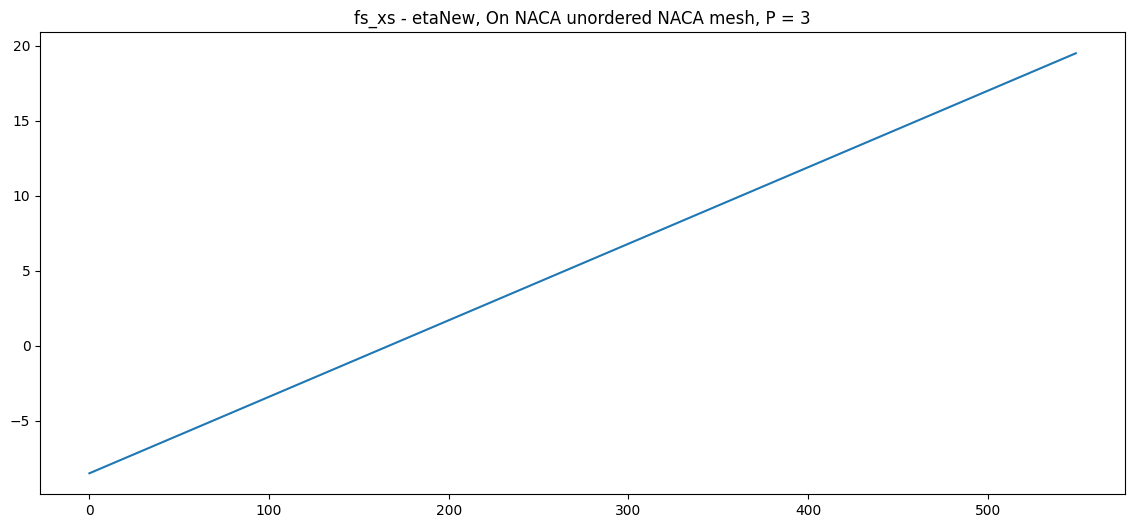

In [17]:
fig, ax = plt.subplots(1, 1, figsize = (14,6))
time = 0
ax.plot(fs_xs[0])
#ax.plot(np.linspace(-8,27, len(fs_xs[time])), np.sin(np.linspace(-8,27, len(fs_xs[time]))), linestyle = "--")
ax.set_title(f"fs_xs - etaNew, On NACA unordered NACA mesh, P = 3")
# ax.set_xlim(5,10)
plt.show()

In [18]:
np.sin(fs_xs[0]/(8+27))

array([-2.40476903e-01, -2.39062215e-01, -2.37647020e-01, -2.36231320e-01,
       -2.34815118e-01, -2.33398417e-01, -2.31981220e-01, -2.30563532e-01,
       -2.29145354e-01, -2.27726688e-01, -2.26307540e-01, -2.24887911e-01,
       -2.23467803e-01, -2.22047222e-01, -2.20626171e-01, -2.19204649e-01,
       -2.17782663e-01, -2.16360214e-01, -2.14937306e-01, -2.13513941e-01,
       -2.12090123e-01, -2.10665854e-01, -2.09241138e-01, -2.07815978e-01,
       -2.06390377e-01, -2.04964337e-01, -2.03537862e-01, -2.02110955e-01,
       -2.00683618e-01, -1.99255856e-01, -1.97827671e-01, -1.96399065e-01,
       -1.94970042e-01, -1.93540606e-01, -1.92110758e-01, -1.90680502e-01,
       -1.89249842e-01, -1.87818780e-01, -1.86387319e-01, -1.84955462e-01,
       -1.83523212e-01, -1.82090573e-01, -1.80657547e-01, -1.79224137e-01,
       -1.77790347e-01, -1.76356179e-01, -1.74921637e-01, -1.73486723e-01,
       -1.72051441e-01, -1.70615794e-01, -1.69179785e-01, -1.67743416e-01,
       -1.66306691e-01, -

import firedrake as fd

P =3
mesh = fd.UnitSquareMesh(100, 100)
V = fd.FunctionSpace(mesh, "CG", P)
V1 = fd.FunctionSpace(mesh, "CG", 1)
fSIndecies = V.boundary_nodes(4)
coordsFS = (fd.Function(fd.VectorFunctionSpace(mesh, "CG", P)).interpolate(mesh.coordinates).dat.data)[fSIndecies,:]
fsMesh = fd.IntervalMesh(len(fSIndecies)-1, 0, 1)
fsMesh.coordinates.dat.data[:] = coordsFS[:,0]

Vfs = fd.FunctionSpace(fsMesh, "CG", 1)
eta = fd.Function(Vfs)
eta.dat.data[:] = coordsFS[:,1]

newEta = fd.Function(Vfs)
newEta.dat.data[:] = np.sin(2*3.14*coordsFS[:,0])

coords = mesh.coordinates.dat.data[:]
M = 0.5
coordsMask = coords[:, 1] > M

eta2d = np.interp(coords[coordsMask,0], fsMesh.coordinates.dat.data[:], eta.dat.data[:])
newEta2d = np.interp(coords[coordsMask,0], fsMesh.coordinates.dat.data[:], newEta.dat.data[:])

coords[coordsMask, 1] = M + (newEta2d - M)/(eta2d - M) * (coords[coordsMask, 1] - M)
mesh.coordinates.dat.data[:] = coords

plt.plot(coordsFS[::3,0], coords[V1.boundary_nodes(4), 1])
